Multi-layered Perceptron (MLP):
MLP is an example of Artificial Neural Network (ANN) and the simplest MLP model has 3 layers: input, hidden and output. We shall use MLP for classification. We would like to build an MLP Classifier model to predict the type of wine given a set of predictors.
Data Pre-processing:
The neural network in Python may have difficulty converging before the maximum number of iterations allowed if the data is not normalized. Multi-layer Perceptron is sensitive to feature scaling, so it is highly recommended to scale your data. Note that you must apply the same scaling to the test set for meaningful results. There are a lot of different methods for normalization of data, we will use the built-in StandardScaler for standardization.


MLP Classifier
This is a supervised learning technique. 
predict the type of iris based on the inputs for sepal length, sepal width, petal length and petal width.


In [2]:
#Import dependencies for Multi-Layer Perceptron 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


irises classes are:  ['setosa' 'versicolor' 'virginica']
The predict y value is that is the iris type  [1]


The predict y value is that is the iris type  [2]


Confusion Matrix is 
[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38





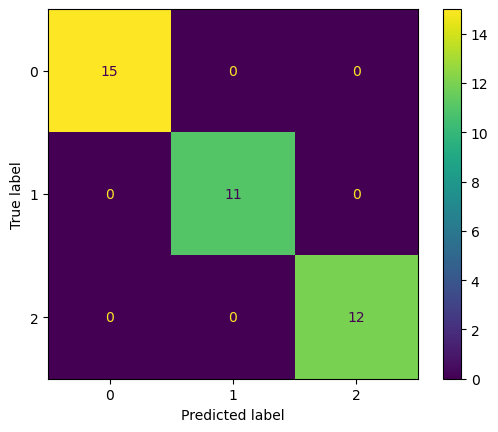

In [18]:
#Example 1
#https://www.springboard.com/blog/beginners-guide-neural-network-in-python-scikit-learn-0-18/
#Part 2 Vary the number of layers and perceptrons
#MLP Classifier for irises

#Load dataset and explore dataset
irises = datasets.load_iris() #load dataset/select features here
X = irises.data
#print(X)
y = irises.target

class_names = irises.target_names
print("irises classes are: ", class_names)
 
 
#Train, test and split the dataset. Random number generator, with popular integer see numbers are 0 and 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) #Test size
 
#Pre-processing - transformation, etc...
scaler = StandardScaler()
 
# Fit only to the training data
scaler.fit(X_train)
 
# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
 
#Create an MLP model with 4 hidden layers with varying number of perceptrons in each layer, number of iterations is 500
mlp = MLPClassifier(hidden_layer_sizes=(2,5,7,9),max_iter=2000)
 
#Fit the model
classifier = mlp.fit(X_train,y_train)
 
#Prediction 
y_pred = mlp.predict(X_test)
 
#Define a set of predictor inputs and use the model to make a prediction of the y ouput. The order of the values are
#aligned to the order of the columns
new_input = [[5, 3.2, 1.2, 0.4]]
new_y = mlp.predict(new_input)
print("The predict y value is that is the iris type ", new_y)
print("\n")
 
new_input2 = [[7.8, 2.5, 6.5, 1.9]]
new_y2 = mlp.predict(new_input2)
print("The predict y value is that is the iris type ", new_y2)
print("\n")
 
 
#Model Evaluation
#https://scikit-learn.org/stable/modules/model_evaluation.html
#clustering-metrics
print("Confusion Matrix is ")
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))
print("\n")
 
 
# Plot non-normalized confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=mlp.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=mlp.classes_)
disp.plot()
plt.show()

In [19]:
#https://www.springboard.com/blog/beginners-guide-neural-network-in-python-scikit-learn-0-18/
#Part 2 Vary the number of layers and perceptrons
#MLP Classifier

#Load dataset and explore dataset
dataset = pd.read_csv('wine.txt', delimiter = ",")
print(dataset.head())
print("\n")
print("Information about the number of records and columns ",dataset.shape)
print("\n")
print(dataset.isnull().sum())
print("\n")
print(dataset.describe().transpose())
print("\n")

#Select all columns except for Wine type as predictors and Wine type as target variable; axis = 1 refers to columns
X = dataset.drop('Wine',axis=1)
y = dataset['Wine']

#Train, test and split the dataset. Random number generator, with popular integer see numbers are 0 and 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#Pre-processing - transformation, etc...
scaler = StandardScaler()

# Fit only to the training data
scaler.fit(X_train)

# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#Create an MLP model with 4 hidden layers with varying number of perceptrons in each #layer, number of iterations is 500
mlp = MLPClassifier(hidden_layer_sizes=(2,5,7,9),max_iter=2000)

#Fit the model
mlp.fit(X_train,y_train)

#Prediction 
y_pred = mlp.predict(X_test)

#Define a set of predictor inputs and use the model to make a prediction of the y ouput. The #order of the values are
#aligned to the order of the columns
new_input = [[12, 2.2, 2.3, 19, 80, 1.5, 2.0, 0.2, 1.2, 1.2, 2.5, 1.4, 390]]
new_y = mlp.predict(new_input)
print("The predict y value is that is the wine type ", new_y)
print("\n")

#Model Evaluation
#https://scikit-learn.org/stable/modules/model_evaluation.html#clustering-metrics
print("Confusion Matrix is ")
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))
print("\n")

print("=======================================================")
print(len(mlp.coefs_))
print(mlp.coefs_)
print("\n")
print("=======================================================")
print(len(mlp.intercepts_))
print(mlp.intercepts_)
print("\n")



   Wine  Alcohol  Malic.acid   Ash   Acl   Mg  Phenols  Flavanoids  \
0     1    14.23        1.71  2.43  15.6  127     2.80        3.06   
1     1    13.20        1.78  2.14  11.2  100     2.65        2.76   
2     1    13.16        2.36  2.67  18.6  101     2.80        3.24   
3     1    14.37        1.95  2.50  16.8  113     3.85        3.49   
4     1    13.24        2.59  2.87  21.0  118     2.80        2.69   

   Nonflavanoid.phenols  Proanth  Color.int   Hue    OD  Proline  
0                  0.28     2.29       5.64  1.04  3.92     1065  
1                  0.26     1.28       4.38  1.05  3.40     1050  
2                  0.30     2.81       5.68  1.03  3.17     1185  
3                  0.24     2.18       7.80  0.86  3.45     1480  
4                  0.39     1.82       4.32  1.04  2.93      735  


Information about the number of records and columns  (178, 14)


Wine                    0
Alcohol                 0
Malic.acid              0
Ash                     0
Acl   

Wine classes are:  ['class_0' 'class_1' 'class_2']
The predict y value is that is the wine type  [2]


Confusion Matrix is 
[[15  0  0]
 [ 0 18  0]
 [ 0  1 11]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.95      1.00      0.97        18
           2       1.00      0.92      0.96        12

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45





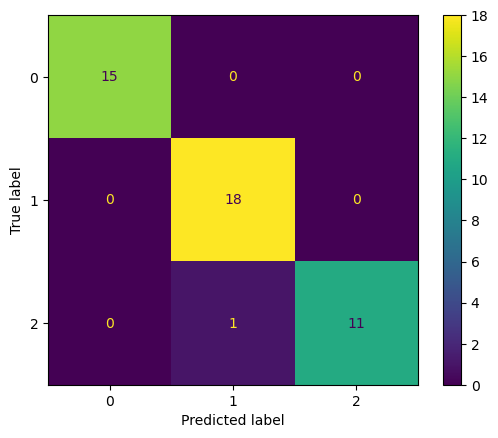

In [20]:
#Example 2
#https://www.springboard.com/blog/beginners-guide-neural-network-in-python-scikit-learn-0-18/
#Part 2 Vary the number of layers and perceptrons
#MLP Classifier
 
 

 
#Load dataset and explore dataset
wine = datasets.load_wine()
X = wine.data
y = wine.target
class_names = wine.target_names
print("Wine classes are: ", class_names)
 
 
#Train, test and split the dataset. Random number generator, with popular integer see numbers are 0 and 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
 
#Pre-processing - transformation, etc...
scaler = StandardScaler()
 
# Fit only to the training data
scaler.fit(X_train)
 
# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
 
#Create an MLP model with 4 hidden layers with varying number of perceptrons in each layer, number of iterations is 500
mlp = MLPClassifier(hidden_layer_sizes=(2,5,7,9),max_iter=2000)
 
#Fit the model
classifier = mlp.fit(X_train,y_train)
 
#Prediction 
y_pred = mlp.predict(X_test)
 
#Define a set of predictor inputs and use the model to make a prediction of the y ouput. The order of the values are
#aligned to the order of the columns
new_input = [[12, 2.2, 2.3, 19, 80, 1.5, 2.0, 0.2, 1.2, 1.2, 2.5, 1.4, 390]]
new_y = mlp.predict(new_input)
print("The predict y value is that is the wine type ", new_y)
print("\n")
 
#Model Evaluation
#https://scikit-learn.org/stable/modules/model_evaluation.html
#clustering-metrics
print("Confusion Matrix is ")
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))
print("\n")
 
 
# Plot a confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=mlp.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=mlp.classes_)
disp.plot()
plt.show()

